# NDFDS2 - Projeto de Data Wrangling

#### Autor: Márcio Souza de Oliveira
#### E-mail: emaildomso@gmail.com

## 1) Coleta de Dados

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Baixa o arquivo da URL informada e retorna o nome do mesmo.
def get_file(url):
    filename = url.split('/')[-1]
    response = requests.get(url)
    if response.status_code == 200:
        try:
            with open(filename, mode='wb') as file:
                file.write(response.content)
            print('Arquivo {} baixado com sucesso!'.format(filename))
        except IOError as err:
            filename = ""
            print("Erro de I/O: {}".format(err))
    else:
        filename = ""
        print('URL inválida.')
    return filename

#### 1.1) Arquivo WeRateDogs (`twitter-archive-enhanced.csv`)

In [3]:
wrd_file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
filename = get_file(wrd_file_url)

Arquivo twitter-archive-enhanced.csv baixado com sucesso!


In [220]:
df_wrd = pd.read_csv(filename)
df_wrd.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [221]:
# Considerando apenas classificações originais (não retweets)
df_wrd = df_wrd[df_wrd.retweeted_status_id.isnull()]
df_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### 1.2) Arquivo de previsão de imagens (`image-predictions.tsv`)

In [5]:
ip_file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = get_file(ip_file_url)

Arquivo image-predictions.tsv baixado com sucesso!


In [6]:
df_ip = pd.read_csv(filename, delimiter='\t')
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 1.3) Arquivo de contagem de retweets e favoritos (`tweet_json.txt`)

In [222]:
# Lê dados de autenticação da API guardados no arquivo 'api_data.txt'
# Cada dado deve estar numa linha no formato (nome do dado, TAB, valor do dado)
# E conforme a ordem abaixo:
# 
# CONSUMER_KEY	xpto1234
# CONSUMER_SECRET	xpto1234
# OAUTH_TOKEN	xpto1234
# OAUTH_TOKEN_SECRET	xpto1234
#
# OBS: É necessário uma quebra de linha na última linha

with open('api_data.txt') as file:
    CONSUMER_KEY = file.readline()[:-1].split('\t')[-1]
    CONSUMER_SECRET = file.readline()[:-1].split('\t')[-1]
    OAUTH_TOKEN = file.readline()[:-1].split('\t')[-1]
    OAUTH_TOKEN_SECRET = file.readline()[:-1].split('\t')[-1]
    
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [226]:
# Obtendo JSON de tweets com base nos ID's presentes em 'df_wrd' (coluna 'tweet_id')
# Também grava um arquivo 'id_json_errors.txt' com id's que resultaram em falha na API
tweet_file = 'tweet_json.txt'

ids = df_wrd.tweet_id.values
id_errors = []

try:
    with open(tweet_file, 'w') as file:
        for i, id in enumerate(ids):
            clear_output()
            print('Progresso: {:.2f}%\nErros: {}'.format(float((i+1)*100/len(ids)), len(id_errors)))
            try:
                tweet = api.get_status(id, tweet_mode='extended')
                file.write(json.dumps(tweet._json))
                if i < len(ids) - 1:
                    file.write('\n')
            except tweepy.TweepError:
                id_errors.append(id)
    clear_output()
    print('Arquivo {} gravado com sucesso!'.format(tweet_file))
except IOError as err:
    print("Erro de I/O: {}".format(err))

if(len(id_errors)) > 0:
    error_json_file = 'id_json_errors.txt'
    print('\nErro obtendo id\'s: {}'.format(id_errors))
    try:
        with open(error_json_file, 'w') as file:
            for id in id_errors:
                file.write(str(id) + '\n')
            print('\nArquivo {} gravado com sucesso!'.format(error_json_file))
    except IOError as err:
        print("\nErro de I/O: {}".format(err))


Arquivo tweet_json.txt gravado com sucesso!


In [172]:
# Gera um dataframe apartir do arquivo 'tweet_json.txt' salvo acima com a contagem de retweets e favoritos de cada ID
df_list = []

try:
    with open(tweet_file) as file:
        for line in file:
            current_json = json.loads(line)
            tweet_id = current_json['id']
            retweet_count = current_json['retweet_count']
            favorite_count = current_json['favorite_count']
            df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
except FileNotFoundError as err:                         
    print("\nErro de I/O: {}".format(err))

df_counts = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_counts.head()
    
    

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8608,38852
1,892177421306343426,6322,33280
2,891815181378084864,4195,25075
3,891689557279858688,8719,42236
4,891327558926688256,9490,40378


## 2) Análise

#### 2.1) Tabela `df_wrd` ("WeRateDogs)

In [156]:
df_wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [158]:
# Source contém tags HTML
df_wrd.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [159]:
# Coluna name contém vários nomes como 'None'
df_wrd.name.value_counts()

None         680
a             55
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
the            8
Winston        8
Lola           8
Daisy          7
Toby           7
Bella          6
Bailey         6
Jax            6
Oscar          6
Koda           6
Bo             6
an             6
Stanley        6
Scout          5
Milo           5
Louis          5
Leo            5
Rusty          5
Dave           5
Buddy          5
Chester        5
            ... 
Gustaf         1
Baloo          1
Carper         1
Reptar         1
Arya           1
Tedders        1
Harrison       1
Fido           1
Dietrich       1
Claude         1
Jazz           1
Stark          1
Tove           1
Jaycob         1
Billl          1
all            1
Sundance       1
Kollin         1
Clybe          1
BeBe           1
Jockson        1
Antony         1
Bookstore      1
Pherb          1
Amy            1
Butter         1
Jimbo          1
Derby         

In [160]:
# Nomes que começam com letra minúscula não parecem ser nomes válidos
sorted(df_wrd.name[df_wrd.name.str.contains('^[a-z]')].unique())

['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very']

In [161]:
# Avaliando distribuição de denominadores
df_wrd.rating_denominator.sort_values()

313       0
2335      2
516       7
0        10
1624     10
1625     10
1626     10
1627     10
1628     10
1629     10
1631     10
1632     10
1633     10
1636     10
1637     10
1630     10
1623     10
1622     10
1621     10
1607     10
1608     10
1609     10
1610     10
1611     10
1612     10
1638     10
1613     10
1615     10
1616     10
1617     10
       ... 
889      10
903      10
905      10
906      10
881      10
883      10
884      10
886      10
882      10
887      10
888      10
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1351     50
1274     50
1202     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2175, dtype: int64

In [162]:
# Comparando avaliações registradas com o texto do tweet para denomidadores diferentes de 10
for reg in df_wrd.query('rating_denominator != 10')[['tweet_id', 'rating_numerator','rating_denominator','text']].values:
    print('- {} ({}/{}) - {}'.format(reg[0], reg[1], reg[2], reg[3]))

- 835246439529840640 (960/0) - @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
- 832088576586297345 (11/15) - @docmisterio account started on 11/15/15
- 820690176645140481 (84/70) - The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
- 810984652412424192 (24/7) - Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
- 758467244762497024 (165/150) - Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
- 740373189193256964 (9/11) - After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
- 731156023742988288 (204/170) - Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
- 722974582966214656 (4/20) - H

In [163]:
#Detectando cachorros com mais de um "estágio"
query = '(doggo == "doggo" & (floofer == "floofer" | pupper == "pupper" | puppo == "puppo"))'\
        '| (floofer == "floofer" & (pupper == "pupper" | puppo == "puppo"))'\
        '| (pupper == "pupper" & puppo == "puppo")'
for reg in df_wrd.query(query)[['tweet_id', 'text', 'doggo', 'floofer', 'pupper', 'puppo']].values:
    print('- {} ({}/{}/{}/{}) - {}'.format(reg[0], reg[2], reg[3], reg[4], reg[5], reg[1]))

- 855851453814013952 (doggo/None/None/puppo) - Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
- 854010172552949760 (doggo/floofer/None/None) - At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
- 817777686764523521 (doggo/None/pupper/None) - This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
- 808106460588765185 (doggo/None/pupper/None) - Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
- 802265048156610565 (doggo/None/pupper/None) - Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
- 801115127852503040 (doggo/None/pupper/None) - This is 

In [164]:
df_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [165]:
df_wrd.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.215172,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.725696,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


#### 2.2) Tabela `df_ip` ("Processamento de Imagens")

In [166]:
df_ip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [167]:
# Tweets cujas imagens não obtiveram uma classificação de raça de cachorro válida
# p1_dog = FALSE, p2_dog = FALSE e p3_dog = FALSE
df_ip.query('~(p1_dog or p2_dog or p3_dog)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [168]:
# Temos raças com underscore separando nomes, alguns com a primeira letra em maiúsculo
df_ip.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [169]:
# Temos menos registros do que em 'df_wrd'
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [170]:
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### 2.3) Tabela `df_counts` ("Contagem de retweets e favoritos")

In [173]:
df_counts

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8608,38852
1,892177421306343426,6322,33280
2,891815181378084864,4195,25075
3,891689557279858688,8719,42236
4,891327558926688256,9490,40378
5,891087950875897856,3138,20245
6,890971913173991426,2092,11868
7,890729181411237888,19081,65642
8,890609185150312448,4309,27808
9,890240255349198849,7486,31987


In [174]:
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 3 columns):
tweet_id          2175 non-null int64
retweet_count     2175 non-null int64
favorite_count    2175 non-null int64
dtypes: int64(3)
memory usage: 51.1 KB


In [175]:
df_counts.describe()

,tweet_id,retweet_count,favorite_count
count,2.175000e+03,2175.000000,2175.000000
mean,7.371205e+17,2712.588506,8709.320000
std,6.748668e+16,4669.190555,12400.133377
min,6.660209e+17,0.000000,51.000000
25%,6.768432e+17,589.000000,1871.000000
50%,7.098528e+17,1303.000000,3964.000000
75%,7.894226e+17,3123.500000,10895.500000
max,8.924206e+17,77467.000000,143554.000000


#### Qualidade
##### Tabela `df_wrd` ("WeRateDogs)
- Coluna `source` com tags HTML (`<a href=>`)
- Avaliação 960/0 incorreta para o tweet_id 835246439529840640 , o correto seria 13/10
- Avaliação 1/2 incorreta para o tweet_id 666287406224695296 , o correto seria 9/10
- Avaliação 9/11 incorreta para o tweet_id 740373189193256964 , o correto seria 14/10
- Avaliação 4/20 incorreta para o tweet_id 722974582966214656 , o correto seria 13/10
- Avaliação 50/50 incorreta para o tweet_id 716439118184652801 , o correto seria 11/10
- Avaliação 7/11 incorreta para o tweet_id 682962037429899265 , o correto seria 10/10
- Coluna `tweet_id`: id 832088576586297345 não possui uma avaliação válida
- Coluna `name`: Nomes com valor 'None' deveriam ser nulos
- Coluna `name`: Nomes que começam com minúsculo não parecem válidos. Ex: the, an, etc.
- Coluna `timestamp` deveria ser DATETIME em vez de STRING
- Colunas `doggo`, `floofer`, `pupper`, `puppo` com valores preenchidos simultaneamente para alguns registros
- Colunas `doggo`, `floofer`, `pupper`, `puppo` com valores 'None' quando poderiam ser nulos (NaN)

##### Tabela `df_ip` ("Processamento de Imagens")
- Nem todas os id's foram classificados como cachorros (colunas `p1_dog`, `p2_dog` e `p3_dog` todas falsas)
- Colunas `p1`, `p2` e `p3`: algumas raças com underscore e minúsculo
- Dados ausentes (2075 registros presentes, quando deveriam ser 2175)


#### Arrumação
- Só deveriam existir 2 colunas com a classificação da raça (`breed` e `breed_conf`), usando a classificação mais confiável dentre os 3 grupos de colunas (`pX`, `pX_dog`, `pX_conf`) na tabela `df_ip`
- 1 variável (classificação) em 4 colunas da tabela `df_wrd`
- Contagens de retweets e favoritos deveriam fazer parte de `df_wrd`
- Dados de processamento de imagens deveriam fazer parte de `df_wrd`
- Colunas `retweeted_status_id`, `retweeted_status_user_id` e `retweeted_status_timestamp` deveriam ser removidas da tabela `df_wrd`, pois só temos classificações originais no dataframe após a limpeza inicial.

## 3) Limpeza

In [278]:
tweets = df_wrd.copy()
images = df_ip.copy()
counts = df_counts.copy()

#### 3.1) Dados ausentes
- Os dados ausentes de processamento de imagens para 100 id's não estão disponíveis. Como é exigido que os dados finais sejam apenas de tweets com com imagens (e também não é possível buscar novos dados de processamento de imagem), a solução será descartar os dados que não possuem dados de processamento de imagens, que será feito com um _inner join_ entre as tabelas `df_wrd` (tweets) e `df_dogs` no final da fase de resolução dos problemas estruturais (3.2).

#### 3.2) Problemas Estruturais

#### Nem todas os id's foram classificados como cachorros (colunas `p1_dog`, `p2_dog` e `p3_dog` todas falsas)
**OBS:** É necessário tratar esse problema de qualidade primeiro para poder resolver o problema estrutural seguinte

##### Definição
- Descartar todos os registros que não possuem pelo menos 1 classificação válida de cachorro (`p1_dog` = FALSE, `p2_dog` = FALSE e `p3_dog` = FALSE)

##### Código

In [279]:
images = images.query('p1_dog or p2_dog or p3_dog')

##### Teste

In [280]:
images.query('~(p1_dog or p2_dog or p3_dog)').shape[0]

0

#### Só deveriam existir 2 colunas com a classificação da raça (`breed` e `breed_conf`), usando a classificação mais confiável dentre os 3 grupos de colunas (`pX`, `pX_dog`, `pX_conf`) na tabela `df_ip`

##### Definição
- A estratégia é priorizar a raça classificada em `p1` pois tem confiança em geral maior que as demais (caso esteja inválida, priorizar `p2` e depois `p3`). Então moveremos classificações válidas de `p3` para registros que estão inválidos em `p2` e, repetir o mesmo processo movendo classificações válidas de `p2` para registros que estão inválidos em `p1`. Com isso todos os registros em `p1` deverão ter uma raça classificada.
- Remover as colunas `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf` e `p3_dog`
- Renomear as colunas `p1` e `p1_conf` para `breed` e `breed_conf` respectivamente

##### Código

In [281]:
# Total de classificações válidas em qualquer um dos 3 grupos
images.shape[0]

1751

In [282]:
# Total de classificações válidas apenas em P1
images.query('p1_dog').shape[0]

1532

In [283]:
# O método abaixo filtra os indíces que são falsos em col_dst e verdadeiros em col_src (Ex: ~p2_dog & p3_dog)
# e move os valores de col_src para col_dst para esses índices
def move_breed_values(df, col_src, col_dst):
    query = '~' + col_dst[-1] + ' & ' + col_src[-1]
    indexes = df.query(query).index
    for i in indexes:
        for c in col_dst:
            df.at[i, c] = df.at[i, col_src[col_dst.index(c)]]
    

# Movendo classificações válidas de P3 para inválidos em P2
move_breed_values(images, ['p3', 'p3_conf', 'p3_dog'], ['p2', 'p2_conf', 'p2_dog'])
# Movendo classificações válidas de P2 para inválidos em P1
move_breed_values(images, ['p2', 'p2_conf', 'p2_dog'], ['p1', 'p1_conf', 'p1_dog'])
# Renomeando as colunas
images.rename(columns={'p1': 'breed', 'p1_conf': 'breed_conf'}, inplace=True)
# Descartando as colunas desnecessárias
images.drop(images.columns[5:], axis=1, inplace=True)

##### Teste

In [284]:
# Checando novas colunas e valores preenchidos
images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1751 non-null int64
jpg_url       1751 non-null object
img_num       1751 non-null int64
breed         1751 non-null object
breed_conf    1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


In [285]:
images.head()

,tweet_id,jpg_url,img_num,breed,breed_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### Colunas `doggo`, `floofer`, `pupper`, `puppo` com valores preenchidos simultaneamente para alguns registros
**OBS:** É necessário tratar esse problema de qualidade primeiro para poder resolver o problema estrutural seguinte

##### Definição
- Colocar 'None' em todas as colunas de "estágio" quando o id possuir mais de um preenchido simultaneamente (ou seja, não é possível decidir qual o "estágio" correto)

##### Código

In [286]:
# Total de cachorros sem nenhum "estágio"
tweets.query("doggo == 'None' & floofer == 'None' & pupper == 'None' & puppo == 'None'").shape[0]

1831

In [287]:
# Exibindo os índices de cachorros com mais de um "estágio"
query = '(doggo == "doggo" & (floofer == "floofer" | pupper == "pupper" | puppo == "puppo"))'\
        '| (floofer == "floofer" & (pupper == "pupper" | puppo == "puppo"))'\
        '| (pupper == "pupper" & puppo == "puppo")'


stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']
        
multiple_stages_indexes = tweets.query(query).index
tweets.loc[multiple_stages_indexes, stage_cols]


,doggo,floofer,pupper,puppo
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None
531,doggo,None,pupper,None
565,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
733,doggo,None,pupper,None
889,doggo,None,pupper,None
956,doggo,None,pupper,None


In [288]:
# Total de cachorros com mais de um "estágio"
len(multiple_stages_indexes)

12

In [289]:
# Removendo os "estágios"
tweets.loc[multiple_stages_indexes, stage_cols] = 'None', 'None', 'None', 'None'

##### Teste

In [290]:
tweets.loc[multiple_stages_indexes, stage_cols]

,doggo,floofer,pupper,puppo
191,None,None,None,None
200,None,None,None,None
460,None,None,None,None
531,None,None,None,None
565,None,None,None,None
575,None,None,None,None
705,None,None,None,None
733,None,None,None,None
889,None,None,None,None
956,None,None,None,None


In [291]:
# Total de cachorros sem nenhum estágio (esperado que tenha aumentado com os índices modificados acima)
tweets.query("doggo == 'None' & floofer == 'None' & pupper == 'None' & puppo == 'None'").shape[0]

1843

#### 1 variável (classificação) em 4 colunas da tabela `df_wrd` (tweets)

#### Colunas `doggo`, `floofer`, `pupper`, `puppo` com valores 'None' quando poderiam ser nulos (NaN)
- **OBS:** Esse problema de qualidade será resolvido junto com o problema estrutural acima

##### Definição
- Fazer o pivoteamento das colunas `doggo`, `floofer`, `pupper`, `puppo` para uma coluna `stage` e depois eliminá-las.

##### Código

In [292]:
tweets.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1441,696877980375769088,NaN,NaN,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696877980...,9,10,Misty,None,None,pupper,None
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,None,None,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Apollo. He thought you weren't coming ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835...,8,10,Apollo,None,None,None,None
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,None,None,pupper,None
1657,683142553609318400,NaN,NaN,2016-01-02 04:27:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brandy. She's a member of the Bloods. Men...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683142553...,9,10,Brandy,None,None,pupper,None
1850,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,12,10,None,None,None,pupper,None
1425,697943111201378304,NaN,NaN,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None,None,None
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None


In [293]:
#Contando cada "estágio" na tabela atual
for col in stage_cols:
    print(col + ': ' + str(tweets[col].value_counts()[col]))

doggo: 75
floofer: 9
pupper: 224
puppo: 24


In [294]:
# Fazendo o pivoteamento numa cópia temporária da tabela `tweets`, que foi tratada no problema anterior
# Em seguida, a eliminação dos valores 'None' remanescentes na nova coluna "stage" e um "left join" 
# com a tabela original para incorporar a nova coluna "stage"
tweets_temp = tweets.copy()
tweets_temp = pd.melt(tweets_temp, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
        var_name='stage', value_name='stage_value')
tweets_temp = tweets_temp[tweets_temp.stage_value != 'None'].loc[:,['tweet_id', 'stage']]
tweets = pd.merge(tweets, tweets_temp, on=['tweet_id'], how='left')
tweets.drop(stage_cols, axis=1, inplace=True)

##### Teste

In [295]:
#Checando a remoção das colunas de "estágio" individuais e a criação da nova coluna "stage"
tweets.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1268,696488710901260288,NaN,NaN,2016-02-08 00:20:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 revolutionary af https://t.co/zKzq4nIY86,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696488710...,12,10,None,NaN
1159,705066031337840642,NaN,NaN,2016-03-02 16:23:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He's a Chilean Sohcahtoa. Loves...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705066031...,12,10,Reese,NaN
1496,682242692827447297,NaN,NaN,2015-12-30 16:51:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samson. He patrols his waters on the b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682242692...,11,10,Samson,NaN
1033,715360349751484417,NaN,NaN,2016-03-31 02:09:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bertson. He just wants to say hi. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715360349...,11,10,Bertson,NaN
1847,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,NaN
1140,706516534877929472,NaN,NaN,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this pup in a cooler. Permanently...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706516534...,12,10,None,NaN
1837,672169685991993344,NaN,NaN,2015-12-02 21:45:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradley. That is his sandwich. He carr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672169685...,10,10,Bradley,NaN
785,751205363882532864,NaN,NaN,2016-07-08 00:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""This photographer took pics of her best frien...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/751205363...,12,10,None,NaN
1341,690728923253055490,NaN,NaN,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,8,10,Vinscent,NaN
1967,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,NaN


In [296]:
# Checando a contagem dos "estágios" na nova coluna criada
tweets.stage.value_counts().sort_index()

doggo       75
floofer      9
pupper     224
puppo       24
Name: stage, dtype: int64

#### Contagens de retweets e favoritos deveriam fazer parte de `df_wrd` (tweets)
#### Dados de processamento de imagens deveriam fazer parte de `df_wrd` (tweets)


##### Definição
- Fazer o join das tabelas `df_wrd` (tweets) e `df_ip` (images) pela coluna `tweet_id`
- Fazer o join das tabelas `df_wrd` (tweets) e `df_counts` (counts) pela coluna `tweet_id`

##### Código

In [297]:
tweets = pd.merge(tweets, counts, on=['tweet_id'])
# Aqui serão descartados os tweets que não possuem uma classificação de imagem.
tweets = pd.merge(tweets, images, on=['tweet_id'])

##### Teste

In [298]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 20 columns):
tweet_id                      1686 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1686 non-null object
source                        1686 non-null object
text                          1686 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1686 non-null object
rating_numerator              1686 non-null int64
rating_denominator            1686 non-null int64
name                          1686 non-null object
stage                         250 non-null object
retweet_count                 1686 non-null int64
favorite_count                1686 non-null int64
jpg_url                       1686 non-null object
img_num                       1686 non-nu

#### Colunas `retweeted_status_id`, `retweeted_status_user_id` e `retweeted_status_timestamp` deveriam ser removidas da tabela `df_wrd`, pois só temos classificações originais no dataframe após a limpeza inicial.

##### Definição
- Remover as colunas `retweeted_status_id`, `retweeted_status_user_id` e `retweeted_status_timestamp` da tabela `df_wrd`(tweets).

##### Código

In [299]:
tweets.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


##### Teste

In [300]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
tweet_id                 1686 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1686 non-null object
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
rating_numerator         1686 non-null int64
rating_denominator       1686 non-null int64
name                     1686 non-null object
stage                    250 non-null object
retweet_count            1686 non-null int64
favorite_count           1686 non-null int64
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
breed                    1686 non-null object
breed_conf               1686 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 237.1+ KB


#### 3.3) Problemas de Qualidade

#### Coluna `source` com tags HTML (`<a href=>`)

##### Definição
- Extrair apenas o texto da tag HTML, que é a informação relevante.

##### Código

In [301]:
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1655
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [302]:
tweets.source = tweets.source.str.extract('<.+>(.+)</a>', expand=True)

##### Teste

In [303]:
tweets.source.value_counts()

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

#### Avaliação 960/0 incorreta para o tweet_id 835246439529840640 , o correto seria 13/10
#### Avaliação 1/2 incorreta para o tweet_id 666287406224695296 , o correto seria 9/10
#### Avaliação 9/11 incorreta para o tweet_id 740373189193256964 , o correto seria 14/10
#### Avaliação 4/20 incorreta para o tweet_id 722974582966214656 , o correto seria 13/10
#### Avaliação 50/50 incorreta para o tweet_id 716439118184652801 , o correto seria 11/10
#### Avaliação 7/11 incorreta para o tweet_id 682962037429899265 , o correto seria 10/10
#### Coluna tweet_id: id 832088576586297345 não possui uma avaliação válida

##### Definição
- Corrigir as classificações dos id's apontados e remover a classificação do último id listado

##### Código

In [304]:
#OBS: Para o id 832088576586297345 não foi possível obter a classificação correta, então será atribuído (-1, -1)
correct_ratings = {'835246439529840640': [13, 10],
                  '666287406224695296': [9, 10],
                  '740373189193256964': [14, 10],
                  '722974582966214656': [13, 10],
                  '716439118184652801': [11, 10],
                  '682962037429899265': [10, 10],
                  '832088576586297345': [-1, -1]}


ids = list(map(int, correct_ratings.keys()))

tweets_filtered = tweets[tweets.tweet_id.isin(ids)]
tweets_filtered

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,breed_conf
710,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN,14641,37227,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644
791,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN,1716,4388,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762
821,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,240,2520,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495
1169,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,NaN,18423,39773,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,Chihuahua,0.155207
1668,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,NaN,68,150,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531


In [305]:
for index in list(tweets_filtered.index):
    ratings = correct_ratings[str(tweets.at[index, 'tweet_id'])]
    tweets.at[index, 'rating_numerator'] = ratings[0]
    tweets.at[index, 'rating_denominator'] = ratings[1] 

##### Teste

In [306]:
tweets[tweets.tweet_id.isin(ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,breed_conf
710,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,NaN,14641,37227,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644
791,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,NaN,1716,4388,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762
821,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,NaN,240,2520,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495
1169,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,NaN,18423,39773,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,Chihuahua,0.155207
1668,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,NaN,68,150,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531


#### Coluna `name`: Nomes que começam com minúsculo não parecem válidos. Ex: the, an, etc.

##### Definição
- Substituir todas as ocorrências desses nomes por 'None' (que será tratado no próximo item)

##### Código

In [307]:
sorted(tweets.name[tweets.name.str.contains('^[a-z]')].unique())

['a',
 'actually',
 'all',
 'an',
 'getting',
 'incredibly',
 'infuriating',
 'just',
 'light',
 'my',
 'not',
 'officially',
 'one',
 'quite',
 'space',
 'the',
 'unacceptable',
 'very']

In [308]:
tweets.name = tweets.name.str.replace(r'^[a-z].*', 'None')

##### Teste

In [309]:
tweets[tweets.name.str.contains('^[a-z]')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,breed_conf


#### Coluna `name`: Nomes com valor 'None' deveriam ser nulos

##### Definição
- Substituir todas as ocorrência de 'None' por NaN.

##### Código

In [310]:
tweets.name.value_counts()[:10]

None       499
Cooper      10
Charlie     10
Lucy        10
Tucker       9
Oliver       9
Penny        8
Winston      7
Daisy        7
Sadie        7
Name: name, dtype: int64

In [311]:
tweets.name = tweets.name.replace('None', np.nan)

##### Teste

In [312]:
tweets.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,breed_conf


#### Coluna `timestamp` deveria ser DATETIME em vez de STRING

##### Definição
- Converter a coluna `timestamp` para DATETIME

##### Código

In [313]:
tweets.timestamp = pd.to_datetime(tweets.timestamp)

##### Teste

In [314]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
tweet_id                 1686 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1686 non-null datetime64[ns]
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
rating_numerator         1686 non-null int64
rating_denominator       1686 non-null int64
name                     1187 non-null object
stage                    250 non-null object
retweet_count            1686 non-null int64
favorite_count           1686 non-null int64
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
breed                    1686 non-null object
breed_conf               1686 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(6), object(7)
memory usage: 317.1+ KB


#### Colunas `p1`, `p2` e `p3`: algumas raças com underscore e minúsculo

##### Definição
- Substituir todos os _underscores_ (`_`) apenas na nova coluna `breed`, criada na fase de arrumação, por espaços e colocar todas as raças em caixa baixa para padronizar

##### Código

In [315]:
tweets.breed = tweets.breed.str.replace('_', ' ')
tweets.breed = tweets.breed.str.lower()

##### Teste

In [316]:
def has_underscore(column):
    clean_column = [x for x in column.unique() if str(x) != 'nan']
    for reg in clean_column:
        if '_' in reg:
            return True
    return False

# Esperado que o resultado imprima 'False'
print(has_underscore(tweets.breed))


False


In [317]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,breed_conf
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6322,33280,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4195,25075,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8719,42236,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador retriever,0.168086
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9490,40378,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3138,20245,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,0.425595
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,2092,11868,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703
6,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,19081,65642,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142
7,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4309,27808,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish terrier,0.487574
8,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7486,31987,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319
9,890006608113172480,NaN,NaN,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,7407,30696,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,samoyed,0.957979


## 4) Salvando os dados limpos

In [318]:
filename = 'twitter_archive_master.csv'
tweets.to_csv(filename, index=False)

In [319]:
#Testando os dados salvos
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 17 columns):
tweet_id                 1686 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1686 non-null object
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
rating_numerator         1686 non-null int64
rating_denominator       1686 non-null int64
name                     1187 non-null object
stage                    250 non-null object
retweet_count            1686 non-null int64
favorite_count           1686 non-null int64
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
breed                    1686 non-null object
breed_conf               1686 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 224.0+ KB


In [320]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,breed_conf
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6322,33280,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4195,25075,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8719,42236,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador retriever,0.168086
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9490,40378,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3138,20245,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,0.425595


## 5) Gerando insights dos dados

##### 5.1) Apesar da grande quantidade de tweets realizados, apenas uma pequena parte é classificada pelo autor. Nessa amostra temos 1.686 tweets originais (que não são retweets) onde apenas 250 tweets receberam uma classificação (Doggo, Puppo, Floofer, Puppo)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 17 columns):
tweet_id                 1686 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1686 non-null object
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
rating_numerator         1686 non-null int64
rating_denominator       1686 non-null int64
name                     1187 non-null object
stage                    250 non-null object
retweet_count            1686 non-null int64
favorite_count           1686 non-null int64
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
breed                    1686 non-null object
breed_conf               1686 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 224.0+ KB


#### E podemos notar que a grande maioria dos tweets avaliados correspondem a "Pupper". Talvez o autor tenha uma grande preferência por filhotes (E quem não tem, rs?)

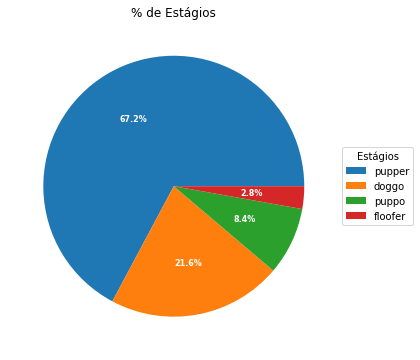

In [49]:

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

data = df.stage.value_counts()

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: "{:.1f}%".format(pct), 
                                  textprops=dict(color="w"))

ax.legend(data.index, title="Estágios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("% de Estágios")
plt.show()


#### Também é notável que a classificação faz alguma diferença quando olhamos a quantidade média de retweets e favoritos em comparação aos tweets não classificados (com exceção dos "Puppers" que curiosamente foram os mais classificados pelo autor, como já vimos)

In [102]:
# Média de favoritos para tweets não classificados
unclassified = pd.Series([df[df.stage.isnull()]['favorite_count'].mean()], index=['não classificados'])

# Média de favoritos por classificação
classified = df.groupby('stage')['favorite_count'].mean()

all_favorites = pd.concat([unclassified, classified])

# Média de retweets para tweets não classificados
unclassified = pd.Series([df[df.stage.isnull()]['retweet_count'].mean()], index=['não classificados'])

# Média de retweets por classificação
classified = df.groupby('stage')['retweet_count'].mean()

all_retweets = pd.concat([unclassified, classified])

#Exibindo todos os dados em um DataFrame
merged = pd.concat([all_favorites, all_retweets], axis=1)
merged.columns = ['Favoritos', 'Retweets']
merged.sort_values(by='Favoritos', ascending=False)

,Favoritos,Retweets
puppo,22204.142857,6392.952381
doggo,19130.000000,6870.851852
floofer,12947.714286,4823.571429
não classificados,8806.404596,2599.471448
pupper,7480.892857,2373.505952


##### 5.2) Aqui podemos observar que a avaliação do autor pesa no sucesso de um tweet. A maior parte das avaliações feitas possuem um numerador entre 10 e 12, com um valor mediano de 1.394 retweets e 4.347 favoritos. Já os tweets com avaliações maiores que 12 possuem um incrível valor mediano de 4.031 retweets e 17.148 favoritos enquanto os que tem avaliações menores de 10 possuem um valor mediano de apenas 587 retweets e 1.763 favoritos.

In [111]:
# Distribuição das avaliações do autor (numerador)
numerator_dist = df.loc[:,['rating_numerator']].describe()
numerator_dist.columns = ['Numerador (estatísticas)']
numerator_dist

,Numerador (estatísticas)
count,1686.000000
mean,11.465599
std,8.045844
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,165.000000


In [104]:
# Contagem mediana de retweets e favoritos para avaliações (numerador) entre 10 e 12
normal_numerator = df.query('rating_numerator >= 10 or rating_numerator <= 12').loc[:,['retweet_count','favorite_count']].median()
# Contagem mediana de retweets e favoritos para avaliações (numerador) maiores que 12
low_numerator = df.query('rating_numerator < 10').loc[:,['retweet_count','favorite_count']].median()
# Contagem mediana de retweets e favoritos para avaliações (numerador) menores que 10
high_numerator = df.query('rating_numerator > 12').loc[:,['retweet_count','favorite_count']].median()

#Exibindo todos os dados em um DataFrame
merged = pd.concat([normal_numerator, low_numerator, high_numerator], axis=1)
merged.columns = ['10~12', '< 10', '> 12']
merged.index = ['Retweets (mediana)', 'Favoritos (mediana)']
merged.sort_values(by="10~12")

,10~12,< 10,> 12
Retweets (mediana),1394.0,587.5,4031.0
Favoritos (mediana),4347.5,1763.0,17148.0


##### É possível constatar uma forte relação entre retweets e favoritos

Text(0,0.5,'Favoritos')

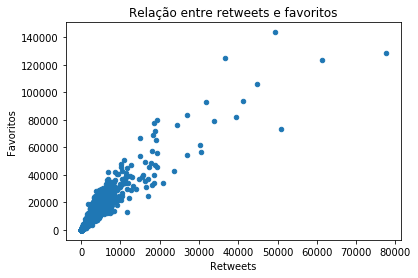

In [108]:
ax = df.plot(x='retweet_count', y='favorite_count', kind='scatter', title="Relação entre retweets e favoritos");
ax.set_xlabel("Retweets")
ax.set_ylabel("Favoritos")

##### Com isso em mente, continuarei focando minha análise apenas nos retweets como indicador de popularidade de um tweet.

##### 5.3) Como última análise, podemos observar as top-10 raças mais populares

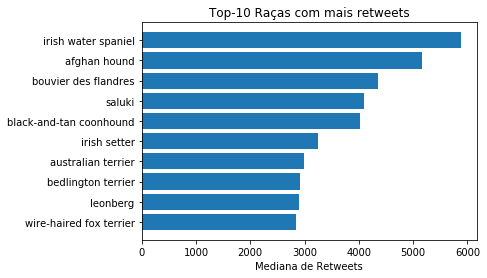

<Figure size 1080x576 with 0 Axes>

In [109]:
data_series = df.groupby('breed')['retweet_count'].median().sort_values(ascending=False).head(10)

labels = data_series.index
y_pos = np.arange(len(data_series))

fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.barh(y_pos, data_series, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mediana de Retweets')
ax.set_title('Top-10 Raças com mais retweets')

plt.show();

##### Quando montamos o ranking pelas médias, vemos uma coisa curiosa: a raça "Bedlington Terrier" dispara no ranking. Seria algum outlier ou erro não tratado no conjunto de dados?

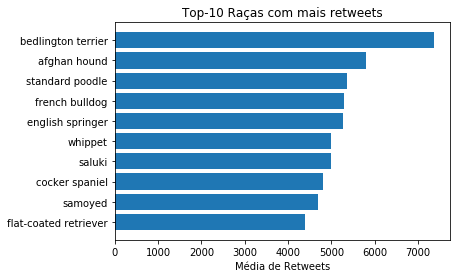

<Figure size 1080x576 with 0 Axes>

In [41]:
data_series = df.groupby('breed')['retweet_count'].mean().sort_values(ascending=False).head(10)

labels = data_series.index
y_pos = np.arange(len(data_series))

fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.barh(y_pos, data_series, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Média de Retweets')
ax.set_title('Top-10 Raças com mais retweets')

plt.show();

##### Olhando os tweets da raça Bedlington Terrier percebemos um em especial com uma grande quantidade de retweets (30.302) e favoritos (61.899):

In [56]:
bedlington_mean = df.query('breed == "bedlington terrier"')['retweet_count'].mean()
df.query('breed == "bedlington terrier" and retweet_count > ' + str(bedlington_mean))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,breed_conf
1243,678399652199309312,NaN,NaN,2015-12-20 02:20:55,Twitter for iPhone,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,NaN,NaN,30302,61899,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,bedlington terrier,0.015047


##### Fazendo uma análise mais apurada nos dados do tweet, percebemos que não há nenhum erro nos dados. 

In [90]:
from IPython.display import HTML

with open('api_data.txt') as file:
    CONSUMER_KEY = file.readline()[:-1].split('\t')[-1]
    CONSUMER_SECRET = file.readline()[:-1].split('\t')[-1]
    OAUTH_TOKEN = file.readline()[:-1].split('\t')[-1]
    OAUTH_TOKEN_SECRET = file.readline()[:-1].split('\t')[-1]
    
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Extraindo a URL do video correspondente ao id 678399652199309312 e incorporando o video no Notebook
tweet = api.get_status(678399652199309312, tweet_mode='extended')
video_url = tweet._json['extended_entities']['media'][0]['video_info']['variants'][1]['url']
video_html = '<div align="middle"><video width="50%" controls><source src="' + video_url + '" type="video/mp4"></video></div>'
HTML(video_html)

##### Afinal, eu mesmo estou "retuitando" essa fofura e não consigo mais parar de assistir esse video... ;-)